<a href="https://colab.research.google.com/github/HarshCasper/Brihaspati/blob/master/Hindi%20Character%20Recognition/Hindi_Character.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model

In [0]:
dataset = pd.read_csv(r"C:\Users\My PC\Downloads\devanagari-character-set\data.csv")

In [0]:
dataset.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [0]:
X = dataset.iloc[:,:-1]
Y_d = dataset.iloc[:,-1]

In [0]:
num_pixels = X.shape[1]
num_classes = 46
img_width = 32
img_height = 32
img_depth = 1

In [0]:
X_images = X.values.reshape(X.shape[0], img_width, img_height)

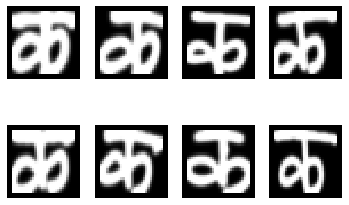

In [0]:
for i in range(1, 9):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1], cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
dataset.iloc[:,1024].value_counts()

character_35_tra             2000
character_07_chha            2000
character_21_pa              2000
character_14_dhaa            2000
digit_6                      2000
character_11_taamatar        2000
character_34_chhya           2000
character_19_dha             2000
character_36_gya             2000
character_20_na              2000
character_16_tabala          2000
character_01_ka              2000
digit_2                      2000
character_08_ja              2000
digit_1                      2000
digit_5                      2000
digit_0                      2000
character_32_patalosaw       2000
character_04_gha             2000
character_10_yna             2000
character_31_petchiryakha    2000
character_02_kha             2000
character_23_ba              2000
character_03_ga              2000
digit_9                      2000
digit_8                      2000
character_33_ha              2000
character_09_jha             2000
character_28_la              2000
character_12_t

In [0]:
rows_to_remove = np.where(dataset.iloc[:,1024].values==1024)
rows_to_remove

(array([], dtype=int64),)

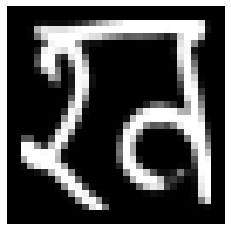

In [0]:
plt.imshow(X_images[2000], cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

In [0]:
dataset = dataset.drop(dataset.index[rows_to_remove[0]])

In [0]:
X = dataset.iloc[:,:-1]
X_images = X.values.reshape(X.shape[0], img_width, img_height)
Y_d = dataset.iloc[:,-1]

In [0]:
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y_d)

In [0]:
X = X / 255

In [0]:
seed = 256 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=seed)

In [0]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
model = baseline_model()

epochs = 10
batch_size = 400
history = model.fit(X_train.values, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, verbose=2)

Train on 51520 samples, validate on 12880 samples
Epoch 1/10
 - 21s - loss: 1.3101 - accuracy: 0.6548 - val_loss: 0.8377 - val_accuracy: 0.7794
Epoch 2/10
 - 6s - loss: 0.6407 - accuracy: 0.8314 - val_loss: 0.5760 - val_accuracy: 0.8470
Epoch 3/10
 - 6s - loss: 0.4107 - accuracy: 0.8953 - val_loss: 0.4532 - val_accuracy: 0.8772
Epoch 4/10
 - 7s - loss: 0.2859 - accuracy: 0.9289 - val_loss: 0.3795 - val_accuracy: 0.8975
Epoch 5/10
 - 7s - loss: 0.2052 - accuracy: 0.9511 - val_loss: 0.3253 - val_accuracy: 0.9127
Epoch 6/10
 - 6s - loss: 0.1490 - accuracy: 0.9675 - val_loss: 0.3057 - val_accuracy: 0.9155
Epoch 7/10
 - 7s - loss: 0.1110 - accuracy: 0.9770 - val_loss: 0.2890 - val_accuracy: 0.9206
Epoch 8/10
 - 7s - loss: 0.0834 - accuracy: 0.9858 - val_loss: 0.2713 - val_accuracy: 0.9252
Epoch 9/10
 - 7s - loss: 0.0617 - accuracy: 0.9912 - val_loss: 0.2642 - val_accuracy: 0.9280
Epoch 10/10
 - 7s - loss: 0.0454 - accuracy: 0.9951 - val_loss: 0.2555 - val_accuracy: 0.9304


In [0]:
scores = model.evaluate(X_test.values, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 92.80%


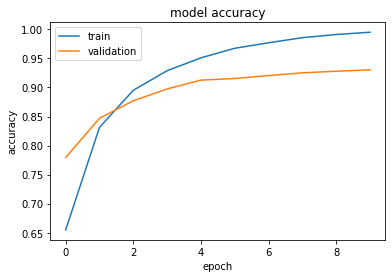

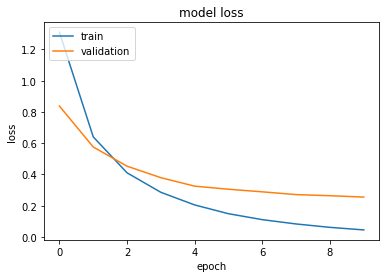

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.20, random_state=seed)

X_train = X_train/255
X_test = X_test/255

In [0]:
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_depth).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_depth).astype('float32')

In [0]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth), 
                     activation='relu', name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name="dense_1"))
    model.add(Dense(50, activation='relu', name="dense_2"))
    model.add(Dense(num_classes, activation='softmax', name="modeloutput"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
model = cnn_model()

early_stopping_monitor = EarlyStopping(patience=2)

epochs = 10
batch_size = 200
history = model.fit(X_train, y_train, validation_split=0.20, epochs=epochs, batch_size=batch_size, 
                    callbacks=[early_stopping_monitor], verbose=2)

W0123 17:27:37.424266 19896 deprecation_wrapper.py:119] From C:\Users\My PC\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Train on 58880 samples, validate on 14720 samples
Epoch 1/10
 - 55s - loss: 1.2450 - accuracy: 0.6605 - val_loss: 0.3945 - val_accuracy: 0.8859
Epoch 2/10
 - 56s - loss: 0.3232 - accuracy: 0.9042 - val_loss: 0.2383 - val_accuracy: 0.9297
Epoch 3/10
 - 55s - loss: 0.2049 - accuracy: 0.9388 - val_loss: 0.1883 - val_accuracy: 0.9437
Epoch 4/10
 - 56s - loss: 0.1511 - accuracy: 0.9543 - val_loss: 0.1496 - val_accuracy: 0.9556
Epoch 5/10
 - 55s - loss: 0.1186 - accuracy: 0.9635 - val_loss: 0.1369 - val_accuracy: 0.9578
Epoch 6/10
 - 54s - loss: 0.0928 - accuracy: 0.9713 - val_loss: 0.1275 - val_accuracy: 0.9616
Epoch 7/10
 - 56s - loss: 0.0804 - accuracy: 0.9748 - val_loss: 0.1210 - val_accuracy: 0.9639
Epoch 8/10
 - 69s - loss: 0.0682 - accuracy: 0.9778 - val_loss: 0.1209 - val_accuracy: 0.9656
Epoch 9/10
 - 61s - loss: 0.0573 - accuracy: 0.9807 - val_loss: 0.1046 - val_accuracy: 0.9701
Epoch 10/10
 - 53s - loss: 0.0508 - accuracy: 0.9833 - val_loss: 0.1039 - val_accuracy: 0.9704


In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.00%


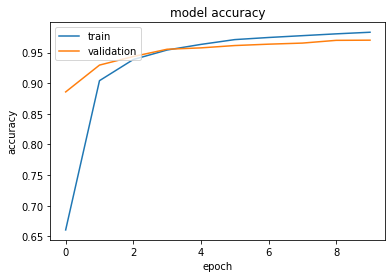

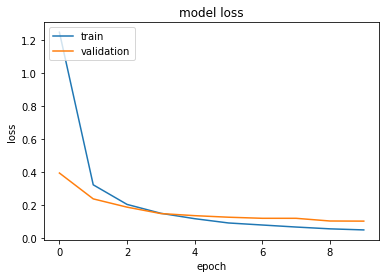

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()